In [36]:
# library
import numpy as np
import gff2coverage
import pandas as pd
path_gff = 'data/results/all.gff'
path_genome = 'data/Stuberosum_genome.gff3'
chr_name = 'chr03'
te_types = ['MITE', 'TRIM', 'LARD', 'TIR','helitron','LTR','SINE', 'LINE']
unit_value = 1000000
unit_name = 'MB'

In [37]:
#load chromosomal srtucture
df_genome = pd.read_csv(path_genome, sep='\t')
df_genome.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
df_genome = df_genome[df_genome.seqname == chr_name]
max_chr = df_genome.iloc[0].end
df_genome

,seqname,source,feature,start,end,score,strand,frame,attribute
3,chr03,.,chromosome,0,62290286,.,0,.,.


In [38]:
#load data
df = pd.read_csv(path_gff, sep='\t')
df.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
df = df[df.seqname == chr_name]
print('For %s:%i' % (chr_name, len(df.index),) )

For chr03:24983


In [39]:
#dfs = {}
#for seq in df_genome.seqname.unique():
#    dfs[seq] = df[df.seqname == seq]

In [40]:
#separate by MB and calculate coverage
bins = (max_chr / unit_value) + 1
x = range(0,bins)
y = []
for te in te_types:
    current = []
    for i in range(1, max_chr, unit_value):
        nt_start = i
        nt_end = i + unit_value - 1
        df_res = df[((df.start + df.end) / 2 >= nt_start) & ((df.start + df.end) / 2 <= nt_end) & (df.attribute.str.contains(te))]
        coverage = gff2coverage.calc_coverage_part(df_res, unit_value)
        current.append(coverage)
#        print(te, coverage)
    y.append(current)

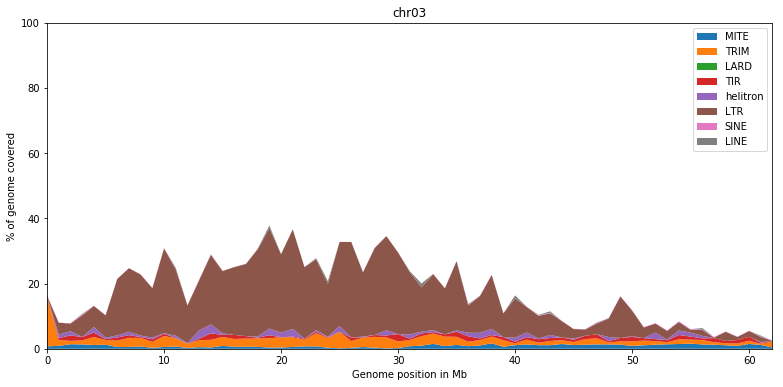

In [42]:
%matplotlib inline
# Plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 6]
plt.ylabel('% of genome covered', fontsize=10)
plt.xlabel('Genome position in Mb', fontsize=10)
plt.margins(x=0)
axes = plt.gca()
axes.set_ylim([0,100])
plt.stackplot(x,y, labels=te_types)
plt.legend(loc='best')
plt.title(chr_name)
plt.show()

In [ ]:
x = range(0,6)
y=[ [1,1,4,6,8,10], [1,2,2,7,10,10], [1,2,8,5,10,1] ]
# Plot
axes = plt.gca()
plt.margins(x=0)
axes.set_ylim([0,100])

plt.stackplot(x,y, labels=te_types)
plt.legend(loc='upper right')
plt.show()